# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [ ]:
# from utils import get_dataset

In [ ]:
# dataset = get_dataset("PROCESSED TF RECORD PATH")

In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [20]:
# Construct a tf.data.Dataset
ds = tfds.load('voc', split='validation')
# ds = tfds.load('coco', split='validation', as_supervised=True)
ds

<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'image/filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'labels': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'labels_no_difficult': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'objects': {'bbox': TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), 'is_difficult': TensorSpec(shape=(None,), dtype=tf.bool, name=None), 'is_truncated': TensorSpec(shape=(None,), dtype=tf.bool, name=None), 'label': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'pose': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}}>

In [35]:

# ds = ds.take(10)  # Only take a single example

for example in ds.take(10):  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  # print(list(example.keys()))
  # print(image.shape, label)

   image, label, obj = example['image'], example['labels'], example['objects']
   
   print(obj['bbox'].numpy())
   print('---')

[[0.12       0.59       0.85066664 0.754     ]
 [0.32266667 0.512      0.888      0.658     ]
 [0.02666667 0.294      0.9866667  0.526     ]]
---
[[0.066    0.003003 1.       1.      ]]
---
[[0.03899721 0.058      0.9247911  0.994     ]]
---
[[0.15315315 0.224      0.9399399  0.434     ]]
---
[[0.668      0.33239436 0.964      0.82535213]
 [0.696      0.6197183  1.         0.9802817 ]
 [0.562      0.4140845  0.678      0.5915493 ]]
---
[[0.03       0.04477612 0.738      0.90149254]]
---
[[0.10933334 0.002      1.         0.858     ]]
---
[[0.362 0.066 0.93  0.82 ]
 [0.6   0.864 0.852 0.948]
 [0.676 0.934 0.862 0.986]]
---
[[0.038      0.02409638 0.788      0.9427711 ]]
---
[[0.0669456 0.022     0.9309623 0.872    ]]
---


In [ ]:
for img, label in tfds.as_numpy(ds.take(2)):
  print(img.shape)

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [40]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    cols = 5
    rows = len(batch)//cols
    f, ax = plt.subplots(rows, cols)

    for i, example in enumerate(batch):
      image, label, obj = example['image'], example['labels'], example['objects']
      image = np.array(image)
      ax[i//cols, i%cols].imshow(image)

      w, h, _ = image.shape
      bboxes = obj['bbox'].numpy()
      # resize the bboxes
      bboxes[:, [0, 2]] *= w
      bboxes[:, [1, 3]] *= h
      for bb in bboxes:
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax[i//cols, i%cols].add_patch(rec)

    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

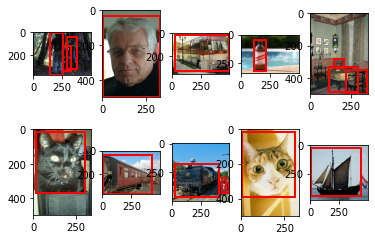

In [41]:
## STUDENT SOLUTION HERE
display_instances(ds.take(10))

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...